In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
 # Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import pandas as pd
import numpy

In [3]:

%cd /content/drive/My Drive

/content/drive/My Drive


In [4]:
!ls

'10th Marksheet Anie.pdf'
'Colab Notebooks'
'Copy of movie_poster.csv'
'CSE section D 🤘'
'DL Resources.gdoc'
'Sentiment Analysis Dataset'
'Shop list.gsheet'


In [17]:
from tqdm import tqdm                                                             # remove not present images from df_orig
from keras.preprocessing import image
df_orig = pd.read_csv('Copy of movie_poster.csv', encoding = "ISO-8859-1" )
df_orig=df_orig.drop([ 'title', 'url', 'image_url', 'year'],axis=1)

df_orig_copy = df_orig.copy()
k = df_orig.shape[0]
#k=100
for i in tqdm(range(k)):
 # if i!=1461  :
    try:
      img = image.load_img('MOVIE POSTER CHALLENGE/posters/'+df_orig['tid'][i]+'.jpg',target_size=(400,400,3))
    except (FileNotFoundError ) as e:
      print("i: ",i) # caution do not do df = df.drop([df.index[i]]) as it causes keyerror for some reason
      df_orig.drop(i, inplace=True)  
  #else :       
   # df_orig.drop(i, inplace=True)

"""
df_orig['action'] = df_orig['action'].map({'TRUE': 1, 'FALSE': 0})
df_orig['scifi'] = df_orig['scifi'].map({'TRUE': 1, 'FALSE': 0})
df_orig['drama'] = df_orig['drama'].map({'TRUE': 1, 'FALSE': 0})
df_orig['romance'] = df_orig['romance'].map({'TRUE': 1, 'FALSE': 0})


"""

df_orig_test = df_orig.tail(230)

#df_orig = df_orig.loc[np.r_[0:150, 160:1130,1140:1450, 1470:2200], :]     # to remove errors in rows use this line
df_orig = df_orig.head(2200)

df_orig.info()

 47%|████▋     | 1155/2455 [00:35<00:28, 46.07it/s]

i:  1150


 51%|█████     | 1253/2455 [00:38<00:25, 47.42it/s]

i:  1250


 57%|█████▋    | 1404/2455 [00:42<00:29, 35.05it/s]

i:  1398


 64%|██████▍   | 1570/2455 [00:48<00:27, 32.17it/s]

i:  1561


 65%|██████▌   | 1608/2455 [00:49<00:29, 28.53it/s]

i:  1604


 67%|██████▋   | 1641/2455 [00:51<00:27, 29.46it/s]

i:  1633
i:  1635


 68%|██████▊   | 1670/2455 [00:52<00:34, 22.67it/s]

i:  1673


 69%|██████▊   | 1682/2455 [00:53<00:58, 13.11it/s]

i:  1679


 70%|███████   | 1720/2455 [00:55<00:37, 19.61it/s]

i:  1712
i:  1713
i:  1718


 71%|███████   | 1733/2455 [00:55<00:27, 26.57it/s]

i:  1733


 71%|███████   | 1746/2455 [00:55<00:22, 31.87it/s]

i:  1736
i:  1739


 74%|███████▍  | 1819/2455 [00:57<00:12, 50.31it/s]

i:  1809


 78%|███████▊  | 1920/2455 [00:59<00:12, 43.11it/s]

i:  1914


 81%|████████  | 1977/2455 [01:01<00:11, 42.68it/s]

i:  1973


 84%|████████▍ | 2069/2455 [01:04<00:13, 29.53it/s]

i:  2064


100%|██████████| 2455/2455 [01:19<00:00, 30.79it/s]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2199
Data columns (total 5 columns):
tid        2141 non-null object
action     2141 non-null object
scifi      2141 non-null object
drama      2141 non-null object
romance    2141 non-null object
dtypes: object(5)
memory usage: 101.2+ KB


In [0]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [20]:

n = 6
img_name = df_orig.iloc[n, 0]
colmns = df_orig.iloc[n, 1:].as_matrix()
colmns = colmns.astype('bool').reshape(-1, 1)

print('Image name: {}'.format(img_name))
print('colmnss shape: {}'.format(colmns.shape))   # landmarks = colmns  // df_orig = landmarks_frame
print('First 4 colmnss: {}'.format(colmns[1][0]))

Image name: tt0253474
colmnss shape: (4, 1)
First 4 colmnss: False


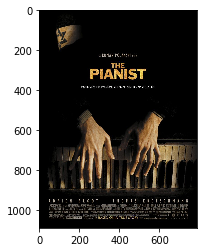

In [21]:
def show_image(image):
    """Show image with landmarks"""
    plt.imshow(image)
    #plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    #plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_image(io.imread(os.path.join('MOVIE POSTER CHALLENGE/posters/', img_name +'.jpg')))
plt.show()

In [0]:

"""
Dataset class

torch.utils.data.Dataset is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:

    __len__ so that len(dataset) returns the size of the dataset.
    __getitem__ to support the indexing such that dataset[i] can be used to get ith sample :
    
     Sample of our dataset will be a dict {'image': image, 'colmns': colmns}.
"""

class MovieDataset(Dataset):
    """Movie dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df_orig = csv_file
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df_orig)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, str(self.df_orig.iloc[idx, 0]) + '.jpg')
        image = io.imread(img_name)
        #colmns = self.df_orig.iloc[idx, 1:]
        #colmns = np.array([colmns])
        colmns = df_orig.iloc[idx, 1:].as_matrix()
        colmns = colmns.astype('bool').reshape(-1,1 )   # change !!!!!!!!!!!!
        sample = {'image': image, 'colmns': colmns}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [0]:
# Let’s instantiate this class and iterate through the data samples. We will print the sizes of first 4 samples

movie_dataset = MovieDataset(csv_file='Copy of movie_poster.csv', root_dir='MOVIE POSTER CHALLENGE/posters/')

In [24]:

count=0
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, colmns = sample['image'], sample['colmns']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size , self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size 
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        #landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'colmns': colmns}

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, colmns = sample['image'], sample['colmns']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        #global count
        #count = count + 1
        #print("count: ",count)
        return {'image': torch.from_numpy(image),
                'colmns': torch.from_numpy(colmns)}
"""
class Resize(object):

    def __init__(self, h,w):
        #assert isinstance(output_size, (int, tuple))
        self.h = h
        self.w = w
   
    def __call__(self,sample):
        
        final_output = None
        channel, height, width = sample['image'].shape
        sample['image'] = torch.squeeze(sample['image'], 1)
  
        for img in sample['image']:
            img_PIL = transforms.ToPILImage()(img)
            img_PIL = torchvision.transforms.Resize([h,w])(img_PIL)
            img_PIL = torchvision.transforms.ToTensor()(img_PIL)
            if final_output is None:
               final_output = img_PIL
            else:
               final_output = torch.cat((final_output, img_PIL), 0)
        final_output = torch.unsqueeze(final_output, 1)
        return final_output
"""

"\nclass Resize(object):\n\n    def __init__(self, h,w):\n        #assert isinstance(output_size, (int, tuple))\n        self.h = h\n        self.w = w\n   \n    def __call__(self,sample):\n        \n        final_output = None\n        channel, height, width = sample['image'].shape\n        sample['image'] = torch.squeeze(sample['image'], 1)\n  \n        for img in sample['image']:\n            img_PIL = transforms.ToPILImage()(img)\n            img_PIL = torchvision.transforms.Resize([h,w])(img_PIL)\n            img_PIL = torchvision.transforms.ToTensor()(img_PIL)\n            if final_output is None:\n               final_output = img_PIL\n            else:\n               final_output = torch.cat((final_output, img_PIL), 0)\n        final_output = torch.unsqueeze(final_output, 1)\n        return final_output\n"

In [0]:
from torchvision import transforms

df_orig.sample(frac=1) #shuffle data

transformed_dataset_train = MovieDataset(csv_file=df_orig,   #df.loc[np.r_[0:5, 10:15, 20:25], :]
                                           root_dir='MOVIE POSTER CHALLENGE/posters/',
                                           transform=transforms.Compose([
                                               #Resize(400,400),
                                               Rescale(400),
                                               #Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()
                                           ]))

transformed_dataset_test = MovieDataset(csv_file=df_orig_test,
                                           root_dir='MOVIE POSTER CHALLENGE/posters/',
                                           transform=transforms.Compose([
                                               #Resize(400,400),
                                               Rescale(400),
                                               #Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()
                                           ]))

In [26]:

for i in  range(len(transformed_dataset_train)):
    sample = transformed_dataset_train[i]

    print(i, sample['image'].size(), sample['colmns'].size())

    if i == 3:
        break

0 torch.Size([3, 400, 400]) torch.Size([4, 1])
1 torch.Size([3, 400, 400]) torch.Size([4, 1])
2 torch.Size([3, 400, 400]) torch.Size([4, 1])
3 torch.Size([3, 400, 400]) torch.Size([4, 1])


In [28]:

f=0
for i in range(len(transformed_dataset_train)):   # to find remove and check  black and white (grey ) images and not present images 
  try:
    sample[f] = transformed_dataset_train[i]
    print("i, f:", i ,f  )
    f = f+1
  except (FileNotFoundError) as e:
    #transformed_dataset_train.drop(i, inplace=True)
    print(" CREATING PROBLEM :", i)
    


i, f: 0 0
i, f: 1 1
i, f: 2 2
i, f: 3 3
i, f: 4 4
i, f: 5 5
i, f: 6 6
i, f: 7 7
i, f: 8 8
i, f: 9 9
i, f: 10 10
i, f: 11 11
i, f: 12 12
i, f: 13 13
i, f: 14 14
i, f: 15 15
i, f: 16 16
i, f: 17 17
i, f: 18 18
i, f: 19 19
i, f: 20 20
i, f: 21 21
i, f: 22 22
i, f: 23 23
i, f: 24 24
i, f: 25 25
i, f: 26 26
i, f: 27 27
i, f: 28 28
i, f: 29 29
i, f: 30 30
i, f: 31 31
i, f: 32 32
i, f: 33 33
i, f: 34 34
i, f: 35 35
i, f: 36 36
i, f: 37 37
i, f: 38 38
i, f: 39 39
i, f: 40 40
i, f: 41 41
i, f: 42 42
i, f: 43 43
i, f: 44 44
i, f: 45 45
i, f: 46 46
i, f: 47 47
i, f: 48 48
i, f: 49 49
i, f: 50 50
i, f: 51 51
i, f: 52 52
i, f: 53 53
i, f: 54 54
i, f: 55 55
i, f: 56 56
i, f: 57 57
i, f: 58 58
i, f: 59 59
i, f: 60 60
i, f: 61 61
i, f: 62 62
i, f: 63 63
i, f: 64 64
i, f: 65 65
i, f: 66 66
i, f: 67 67
i, f: 68 68
i, f: 69 69
i, f: 70 70
i, f: 71 71
i, f: 72 72
i, f: 73 73
i, f: 74 74
i, f: 75 75
i, f: 76 76
i, f: 77 77
i, f: 78 78
i, f: 79 79
i, f: 80 80
i, f: 81 81
i, f: 82 82
i, f: 83 83
i, f: 84 84


In [0]:
train_dataloader = DataLoader(sample, batch_size=64, shuffle=True, num_workers=0)  #calls MovieDataset class

test_dataloader = DataLoader(transformed_dataset_test, batch_size=64, shuffle=True, num_workers=0)

#print(train_dataloader.size()) => AttributeError: 'DataLoader' object has no attribute 'size'

In [30]:
# X = nn.Conv2D( 1, 1, 3, 1, 1) #  ( input_c, output_c, k_size, stride, padding ), k_size can be (3,3) or 3 
import torch.nn as nn
import torch.nn.functional as F

class Flatten(nn.Module):

    def __init__(self):
        super(Flatten, self).__init__()

    def forward(self, x):
        shape = torch.prod(torch.tensor(x.shape[1:])).item()
        return x.view(-1, shape)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, (5,5)) #X = nn.Conv2D( 1, 1, 3, 1, 1) #  ( input_c, output_c, k_size, stride, padding ), k_size can be (3,3) or 3 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 5)
        self.conv4 = nn.Conv2d(64, 64, 5)   
        self.drop1 = nn.Dropout(0.25)
        self.drop2 = nn.Dropout(0.5)
        #self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(28224, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 4)
        self.act = nn.Sigmoid()

    def forward(self, x):
        x = self.drop1(self.pool(F.relu(self.conv1(x))))  # (None, 400, 400, 16)  => (None, 396, 396, 16) => (None, 198, 198, 16) 
        x = self.drop1(self.pool(F.relu(self.conv2(x))))  # (None, 198, 198, 16)  => (None, 194, 194, 32) => (None, 97, 97, 32)
        x = self.drop1(self.pool(F.relu(self.conv3(x))))  # (None, 97, 97, 32)    => (None, 93, 93, 64)   => (None, 46, 46, 64)
        x = self.drop1(self.pool(F.relu(self.conv4(x))))  # (None, 46, 46, 64)    => (None, 42, 42, 64)   => (None, 21, 21, 64)

        #x = torch.flatten(x)                                   # (None, 28224) 
        x = x.view(-1, self.num_flat_features(x))
        #x = x.view(-1, 16 * 4 * 4)
                                                          
  
        x = self.drop2(F.relu(self.fc1(x)))               # (28224, 128)
        x = self.drop2(F.relu(self.fc2(x)))               # (128, 64)
        x = self.act(self.fc3(x))                         # (64,4)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
net = net.double()
print(net)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (drop1): Dropout(p=0.25, inplace=False)
  (drop2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=28224, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
  (act): Sigmoid()
)


In [0]:


criterion = nn.BCELoss().double()    ##############=> is binary cross entropy loss
#torch.nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean')
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

optimizer = torch.optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [34]:
for epoch in range(10):  # loop over the dataset multiple times
  print("epoch :",epoch)
  
  running_loss = 0.0
  try:
    for i, data in enumerate(train_dataloader, 0):
    #for i in range len(train_dataloader):
      #if i!= 1462 and i!=154 :
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data['image'] , data['colmns']
        labels = labels.double()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs).double()
        loss = criterion(outputs, labels).double()
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 64 == 63:    # print every 64 mini-batches
            print('[%d, %5d] loss: %.3f' ,  (epoch + 1, i + 1, running_loss / 64))
            running_loss = 0.0
  except   (KeyError) as e:
    pass
print('Finished Training')

epoch : 0
epoch : 1
epoch : 2
epoch : 3
epoch : 4
epoch : 5
epoch : 6
epoch : 7
epoch : 8
epoch : 9
Finished Training


In [0]:
#####################################################################################33=> PREDICT
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data['image'] , data['colmns']
        outputs = net(images)
        #predicted =  torch.sigmoid(outputs)    #torch.max(outputs.data, 1)
        #total += labels.size(0)
        #correct += (predicted == labels).sum().item()

#print('Accuracy of the network on the 10000 test images: %d %%' % (
    #100 * correct / total))

In [0]:
"""
Accuracy is probably not what you want for Multi-Label classification especially if your classes are unbalanced.

Let’s say you have a class A present for 90% of your dataset, and classes B and C that occurs about 10% of the time, a model that always return class A and never class B and C will have 70% accuracy but no predictive power.

Your metric should be taking into account False positive and False negative. You can check Matthews correlation coefficient or Fbeta score (often F1 score) or Hamming loss that are designed for Multilabel classification and are implemented in Scikit-learn.
Also make sure to read on Precision and Recall.
"""

In [36]:
"""
predicted = (predicted > 0.5)

for batch_idx, data in enumerate(test_dataloader, 0):
     y_pred =  predicted['colmns']      

for batch_idx, data in enumerate(test_dataloader, 0):
     y_test =  data['colmns'] 


#y_test = test_dataloader['colmns'] error

from sklearn.metrics import f1_score, confusion_matrix
#print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
print('Confusion matrix:')

confusion_matrix(y_pred, y_test)
"""
print('Ground Truth: {}'.format(labels))
print('Predicted Truth: {}'.format(outputs))

from sklearn.metrics import f1_score, confusion_matrix,precision_score,recall_score
#np.argmax(y_pred, axis=1)

print('F1: {}'.format(f1_score(np.argmax(labels, axis=1), np.argmax(outputs, axis=1), average="weighted")))

print('Precision: {}'.format(precision_score(np.argmax(labels, axis=1), np.argmax(outputs, axis=1), average="weighted")))
print('Recall: {}'.format(recall_score(np.argmax(labels, axis=1), np.argmax(outputs, axis=1), average="weighted")))

print('Confusion matrix:')

confusion_matrix( np.argmax(outputs, axis=1), np.argmax(labels, axis=1))

Ground Truth: tensor([[[ True],
         [ True],
         [False],
         [False]],

        [[False],
         [False],
         [ True],
         [False]],

        [[False],
         [False],
         [ True],
         [False]],

        [[False],
         [False],
         [ True],
         [False]],

        [[False],
         [False],
         [ True],
         [False]],

        [[ True],
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [ True],
         [False]],

        [[False],
         [False],
         [ True],
         [False]],

        [[False],
         [False],
         [ True],
         [False]],

        [[False],
         [False],
         [ True],
         [False]],

        [[False],
         [False],
         [ True],
         [False]],

        [[False],
         [False],
         [ True],
         [False]],

        [[ True],
         [False],
         [ True],
         [False]],

        [[False],
      

array([[ 0,  0,  0],
       [ 0,  0,  0],
       [ 7,  3, 28]])